# ENGR-E 221 Homework 5: Unsupervised Learning using Clustering

## Due: Friday 9/30/2022 at 23:59 EST

## Homework Details 

Make sure all the source code is complete and working inside the notebook. It is best to save the notebook with ALL plots and outputs visible. 

## 1: Load and Explore the IRIS Dataset (10 points)

```python
iris = datasets.load_iris()
``` 
A. How many features are in the dataset?

B. What is the class label and what does it represent?

C. How many classes are there is the dataset?

D. How many number of records are in the dataset?

E. Is all data numeric or are there categorical columns present?


### 1 Answers

your answers here.

In [3]:
# code for A-E here 
from sklearn.datasets import load_iris
iris=load_iris()
print('There are',len(iris.feature_names) ,' features in the dataset')
print(iris.target_names)
print('There are ',len(iris.target_names),'classes in the dataset')
print('There are ',len(iris.data) ,'records in the dataset')
print(iris.data.dtype)
print(iris.target.dtype)
print('All data are numeric')

There are 4  features in the dataset
['setosa' 'versicolor' 'virginica']
There are  3 classes in the dataset
There are  150 records in the dataset
float64
int32
All data are numeric


## 2: Data Visualization (5 points)

A) Show the distributions for all the features. Discuss what you see in 3-5 sentences. 

B) Show how different feature combinations represent data in a two dimensional domain by plotting data on the x-y plane using two features on each plot. (We expect 6 plots) Discuss what you see in 3-5 sentences. Think about the application of different classification/regression techniques.  

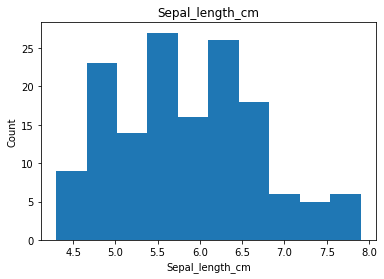

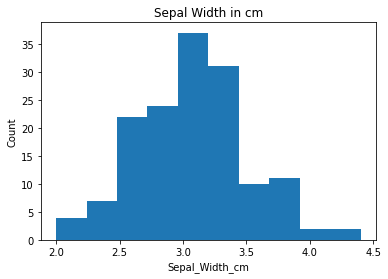

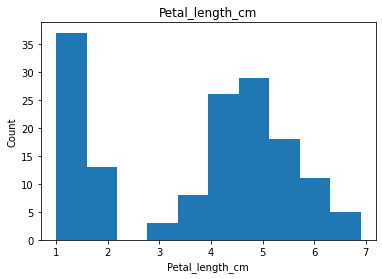

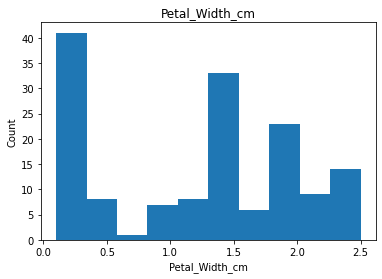

<Figure size 432x288 with 0 Axes>

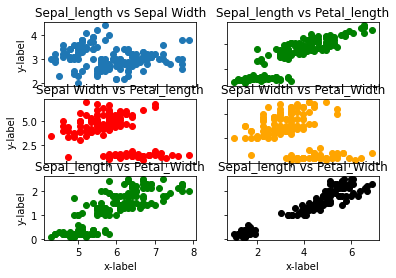

In [4]:
# distrubutions and plots here
import matplotlib.pyplot as plt
x=iris.data[:,0]
plt.hist(x)
plt.title("Sepal_length_cm")
plt.xlabel("Sepal_length_cm")
plt.ylabel("Count")
plt.figure()
y=iris.data[:,1]
plt.hist(y)
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
plt.figure()
z=iris.data[:,2]
plt.hist(z)
plt.title("Petal_length_cm")
plt.xlabel("Petal_length_cm")
plt.ylabel("Count")
plt.figure()
t=iris.data[:,3]
plt.hist(t)
plt.title("Petal_Width_cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
plt.figure()

fig, axs = plt.subplots(3, 2)
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Sepal_length vs Sepal Width')
axs[0, 1].scatter(x, z,color='green')
axs[0, 1].set_title('Sepal_length vs Petal_length')
axs[1, 0].scatter(y, z,color='red')
axs[1, 0].set_title('Sepal Width vs Petal_length')
axs[1, 1].scatter(y, t,color='orange')
axs[1, 1].set_title('Sepal Width vs Petal_Width')
axs[2, 0].scatter(x, t,color='green')
axs[2, 0].set_title('Sepal_length vs Petal_Width')
axs[2, 1].scatter(z, t,color='black')
axs[2, 1].set_title('Sepal_length vs Petal_Width')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')


for ax in axs.flat:
    ax.label_outer()

### 2 Discussion

a) As can be seen, the first two distribution are somewhat normal. The shape of the distribution is close to a bell. The third and the fourth distributions are not normal. Most of the values are at the beginning.

b) Looking at the plots, we can see that most of the datas are forming two groups. It might not be great to use k-means but it is not a terrible choice. We can use the hierarchical method as well and it would give something close to the k means method. Both of the methods can be used but it will not be that good.

## 3:  Data Clustering (10 points)

Use K-means clustering to cluster this data into 2,3,4 and 5 clusters. What is the best choice for the value of K? Expalin your choice of K. Include the Davies-Bouldin score and silhouette coefficient (See Lab 5 for documentation and examples). You can use figures and sentences to support this.

In [5]:
# place clustering results here
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

from sklearn.cluster import KMeans

for k in [2,3,4,5]:
    X_transformed=KMeans(n_clusters=k, random_state=9).fit_transform(X_train)
    clu_kmeans=KMeans(n_clusters=k, random_state=9).fit(X_train)
    clu_kmeans_transformed=KMeans(n_clusters=k, random_state=9).fit(X_transformed)

    lbls = clu_kmeans.labels_
    lbls_trams = clu_kmeans_transformed.labels_

    slh_scr = metrics.silhouette_score(X_train, lbls)
    dbs = metrics.davies_bouldin_score(X_train, lbls)
    slh_scr_trs = metrics.silhouette_score(X_transformed, lbls_trams)
    dbs_trs = metrics.davies_bouldin_score(X_transformed, lbls_trams)
    print('for K=',k)
    print('Silhouette Score:  \n', slh_scr)
    print('Davies Bouldin Score: \n', dbs)
    print('\n')

for K= 2
Silhouette Score:  
 0.6830211055567557
Davies Bouldin Score: 
 0.390602765070389


for K= 3
Silhouette Score:  
 0.5408038361532094
Davies Bouldin Score: 
 0.6873054096781624


for K= 4
Silhouette Score:  
 0.49283002356264266
Davies Bouldin Score: 
 0.7815503600372169


for K= 5
Silhouette Score:  
 0.49399247454377987
Davies Bouldin Score: 
 0.7947014914602474




### 3 Discussion

The closer the silhouette value is to 1, and closer the davies bouldin score to zero, the better is the cluster. when k = 2, it will get the lowest Davies Bouldin Score and the highest Silhouette Score among the other values. Which means that k=2 is the optimal number of k.

## 4: Visualize Clusters (10 points)

A. Visualize clusters from different vantage points by plotting it against two features at a time. (six plots)

B. Make sure the plots are visable in the notebook no need to submit addional figures. 

Text(0.5, 1.0, 'petal length vs petal width')

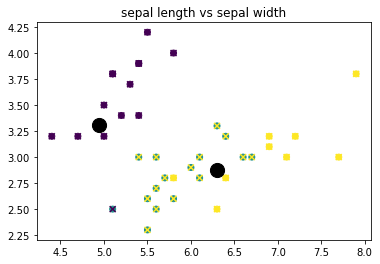

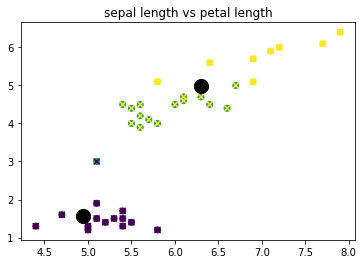

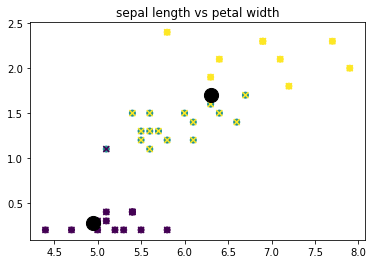

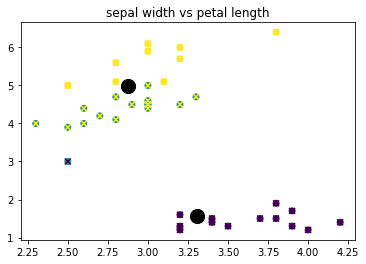

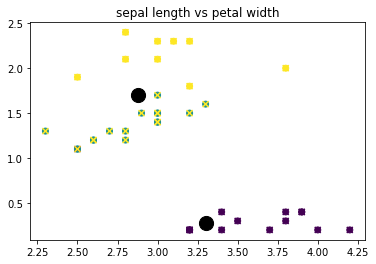

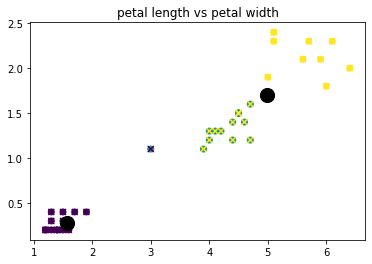

In [6]:
X_transformed=KMeans(n_clusters=2, random_state=9).fit_transform(X_train)
clu_kmeans=KMeans(n_clusters=2, random_state=9).fit(X_train)
clu_kmeans_transformed=KMeans(n_clusters=2, random_state=9).fit(X_transformed)

lbls = clu_kmeans.labels_
lbls_trams = clu_kmeans_transformed.labels_

slh_scr = metrics.silhouette_score(X_train, lbls)
dbs = metrics.davies_bouldin_score(X_train, lbls)
slh_scr_trs = metrics.silhouette_score(X_transformed, lbls_trams)
dbs_trs = metrics.davies_bouldin_score(X_transformed, lbls_trams)
_
centers = clu_kmeans.cluster_centers_
pred_label = clu_kmeans.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1], c=y_test, marker='o')
plt.scatter(X_test[:,0],X_test[:,1], c = pred_label, marker='x')
plt.scatter(centers[:,0],centers[:,1], c='black', s=200)
plt.title('sepal length vs sepal width')
plt.figure()
plt.scatter(X_test[:,0],X_test[:,2], c=y_test, marker='o')
plt.scatter(X_test[:,0],X_test[:,2], c = pred_label, marker='x')
plt.scatter(centers[:,0],centers[:,2], c='black', s=200)
plt.title('sepal length vs petal length')
plt.figure()
plt.scatter(X_test[:,0],X_test[:,3], c=y_test, marker='o')
plt.scatter(X_test[:,0],X_test[:,3], c = pred_label, marker='x')
plt.scatter(centers[:,0],centers[:,3], c='black', s=200)
plt.title('sepal length vs petal width')
plt.figure()
plt.scatter(X_test[:,1],X_test[:,2], c=y_test, marker='o')
plt.scatter(X_test[:,1],X_test[:,2], c = pred_label, marker='x')
plt.scatter(centers[:,1],centers[:,2], c='black', s=200)
plt.title('sepal width vs petal length')
plt.figure()
plt.scatter(X_test[:,1],X_test[:,3], c=y_test, marker='o')
plt.scatter(X_test[:,1],X_test[:,3], c = pred_label, marker='x')
plt.scatter(centers[:,1],centers[:,3], c='black', s=200)
plt.title('sepal length vs petal width')
plt.figure()
plt.scatter(X_test[:,2],X_test[:,3], c=y_test, marker='o')
plt.scatter(X_test[:,2],X_test[:,3], c = pred_label, marker='x')
plt.scatter(centers[:,2],centers[:,3], c='black', s=200)
plt.title('petal length vs petal width')


### 4 Discussion

Used k = 2 to cluster and it does not look bad but it could be better if we used k = 3.

## 5: Accuracy of Data Classification using clustering (semi-supervised learning) (10 points)

Since we already have class labels availabe to us built into the python Iris dataset we can determine if data is being clustered within the correct label. Calculate the
accuracy of this classification for at least three different values of k. Is you selection of k from problem 4 correct? Please discuss these results and feel free to use any other metrics discussed in lecture and lab to support this discussion.  (Hint: it is easier for this data since data is sorted based on classes, So we just need to identify records which were put in wrong cluster by k means. )

In [7]:
# code here 
for k in [2,3,4,5]:
    clu_kmeans=KMeans(n_clusters=k, random_state=9).fit(X_train)
    pred_label = clu_kmeans.predict(X_test)
    score = metrics.accuracy_score(y_test,pred_label)
    print('for k=',k, "score =",score)

for k= 2 score = 0.7368421052631579
for k= 3 score = 0.9210526315789473
for k= 4 score = 0.18421052631578946
for k= 5 score = 0.10526315789473684


### 5 discussion here

No it was not right. In this step, we found that when k = 3, we will get the best Silhouette Score among the other numbers. By looking at the plots, we will see that the plots are consisted of three different colors which makes it reasonable to have 3 k-means. It is obvious that there are three distributions of data by looking at the plots.

## 6: Limitations of kmeans  (5 points)
We have provided you with a classic example of two half moons. Apply kmeans clustering to these data and in your own words discuss the limitations of kmeans. Use the Davies-Bouldin score and silhouette coefficient along with any other metrics you may find useful for the discussion. 

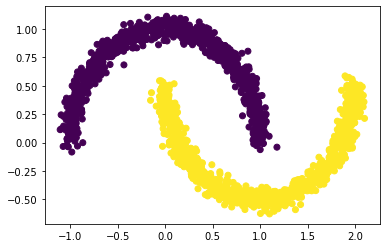

In [8]:
# 6 moon data
import sklearn.datasets
import matplotlib.pyplot as plt
X,y = sklearn.datasets.make_moons([1000,1000], noise=0.05)
plt.scatter(X[:,0],X[:,1], c=y)


Silhouette Score:  
 0.49354031214624616
Davies Bouldin Score: 
 0.7768844884555636


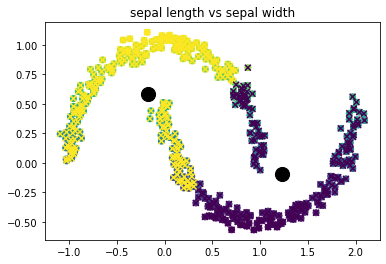

In [10]:
# Students kmeans using moon data
X_train, X_test, y_train, y_test = train_test_split(X, X[:,1], random_state=1)

clu_kmeans=KMeans(n_clusters=2, random_state=9).fit(X_train)


lbls = clu_kmeans.labels_
lbls_trams = clu_kmeans_transformed.labels_

slh_scr = metrics.silhouette_score(X_train, lbls)
dbs = metrics.davies_bouldin_score(X_train, lbls)
slh_scr_trs = metrics.silhouette_score(X_transformed, lbls_trams)
dbs_trs = metrics.davies_bouldin_score(X_transformed, lbls_trams)
centers = clu_kmeans.cluster_centers_
pred_label = clu_kmeans.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1], c=y_test, marker='o')
plt.scatter(X_test[:,0],X_test[:,1], c = pred_label, marker='x')
plt.scatter(centers[:,0],centers[:,1], c='black', s=200)
plt.title('sepal length vs sepal width')
print('Silhouette Score:  \n', slh_scr)
print('Davies Bouldin Score: \n', dbs)


In [14]:
#K-means is not accurate with this data. We can clearly see some part of the first half moon
#clustered as part of the second half moon ,and vice versa